In [39]:
import pandas as pd
import requests
import geopy

# Data Exploration

In [40]:
df = pd.read_csv("C:\\Users\\viven\\Downloads\\Food Delivery dataset\\deliverytime.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [41]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


# Data Segmentation

In [42]:
indore_df = df[df['Delivery_person_ID'].str.contains("INDORE", na=False, case=False)].copy()
print(indore_df.shape)

indore_df.describe()

(3159, 11)


,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000,3159.000000
mean,29.610953,4.631466,22.491861,75.551831,22.799162,75.950793,26.116176
std,5.745799,0.324038,3.327106,7.137813,0.044333,0.037317,9.390824
min,15.000000,1.000000,-22.761593,-75.902847,22.661847,75.876059,10.000000
25%,25.000000,4.600000,22.725835,75.884167,22.770072,75.921991,19.000000
50%,29.000000,4.700000,22.745049,75.887648,22.800040,75.947522,25.000000
75%,35.000000,4.800000,22.751857,75.893400,22.831230,75.976699,32.000000
max,50.000000,6.000000,22.761593,75.903365,22.891593,76.033365,54.000000


In [43]:
from geopy.distance import geodesic

# Indore city's location
city_lat = 22.719568
city_lon = 75.857727

# Define the distance threshold (in meters)
distance_threshold = 10  # Adjust this as needed, it's in kilometers

# Function to calculate the distance from the city center
def calculate_distance(lat, lon, city_lat, city_lon):
    return geodesic((lat, lon), (city_lat, city_lon)).kilometers

# Calculate the distance for restaurant and delivery locations
indore_df['Restaurant_distance'] = indore_df.apply(lambda row: calculate_distance(row['Restaurant_latitude'], row['Restaurant_longitude'], city_lat, city_lon), axis=1)
indore_df['Delivery_distance'] = indore_df.apply(lambda row: calculate_distance(row['Delivery_location_latitude'], row['Delivery_location_longitude'], city_lat, city_lon), axis=1)

# Drop rows that are beyond the distance threshold for both restaurant and delivery locations
indore_df_filtered = indore_df[(indore_df['Restaurant_distance'] <= distance_threshold) & (indore_df['Delivery_distance'] <= distance_threshold)]

# Drop the distance columns
indore_df_filtered = indore_df_filtered.drop(columns=['Restaurant_distance', 'Delivery_distance'])


In [44]:
indore_df_filtered

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
93,6D19,INDORES12DEL02,38,4.9,22.748060,75.893400,22.768060,75.913400,Drinks,scooter,15
104,6757,INDORES05DEL02,24,4.3,22.727021,75.884167,22.747021,75.904167,Meal,motorcycle,19
133,977D,INDORES19DEL02,27,4.7,22.745536,75.893106,22.765536,75.913106,Buffet,motorcycle,14
273,144D,INDORES18DEL02,22,4.8,22.753839,75.897429,22.773839,75.917429,Drinks,motorcycle,19
...,...,...,...,...,...,...,...,...,...,...,...
45383,7C6A,INDORES14DEL02,39,4.2,22.761593,75.886362,22.781593,75.906362,Buffet,motorcycle,32
45393,7266,INDORES08DEL02,26,4.9,22.725748,75.898497,22.745748,75.918497,Buffet,motorcycle,21
45483,120B,INDORES02DEL02,25,4.0,22.651847,75.881991,22.671847,75.901991,Snack,motorcycle,19
45518,863,INDORES05DEL01,29,4.6,22.727021,75.884167,22.737021,75.894167,Snack,electric_scooter,25


# Feature Engineering

In [45]:
import osmnx as ox
import networkx as nx

df1 = indore_df_filtered.copy()

# Define a function to calculate the shortest path distance
def calculate_shortest_path_distance(row, G):
    restaurant_lat_lon = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    delivery_lat_lon = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    
    # Get the nearest nodes to the restaurant and delivery locations
    orig_node = ox.distance.nearest_nodes(G, row['Restaurant_longitude'], row['Restaurant_latitude'])
    dest_node = ox.distance.nearest_nodes(G, row['Delivery_location_longitude'], row['Delivery_location_latitude'])
    
    # Calculate the shortest path distance between the nodes
    shortest_path_distance = nx.shortest_path_length(G, orig_node, dest_node, weight='length')
    
    return shortest_path_distance

# Create a graph from OpenStreetMap data
G = ox.graph_from_point((22.719568, 75.857727), dist=10000, network_type='drive')

# Apply the function to each row in the dataset
df1['Driving_distance'] = df1.apply(lambda row: calculate_shortest_path_distance(row, G), axis=1)

In [46]:
df1

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),driving_distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3967.774166
93,6D19,INDORES12DEL02,38,4.9,22.748060,75.893400,22.768060,75.913400,Drinks,scooter,15,4745.077512
104,6757,INDORES05DEL02,24,4.3,22.727021,75.884167,22.747021,75.904167,Meal,motorcycle,19,3674.590510
133,977D,INDORES19DEL02,27,4.7,22.745536,75.893106,22.765536,75.913106,Buffet,motorcycle,14,4144.178413
273,144D,INDORES18DEL02,22,4.8,22.753839,75.897429,22.773839,75.917429,Drinks,motorcycle,19,4106.179566
...,...,...,...,...,...,...,...,...,...,...,...,...
45383,7C6A,INDORES14DEL02,39,4.2,22.761593,75.886362,22.781593,75.906362,Buffet,motorcycle,32,4856.619253
45393,7266,INDORES08DEL02,26,4.9,22.725748,75.898497,22.745748,75.918497,Buffet,motorcycle,21,3583.268984
45483,120B,INDORES02DEL02,25,4.0,22.651847,75.881991,22.671847,75.901991,Snack,motorcycle,19,5196.644558
45518,863,INDORES05DEL01,29,4.6,22.727021,75.884167,22.737021,75.894167,Snack,electric_scooter,25,2019.953271


In [47]:
new_df = df1[['Delivery_person_Age', 'Delivery_person_Ratings', 'Type_of_vehicle', 'Time_taken(min)', 'Driving_distance']]
new_df

,Delivery_person_Age,Delivery_person_Ratings,Type_of_vehicle,Time_taken(min),driving_distance
0,37,4.9,motorcycle,24,3967.774166
93,38,4.9,scooter,15,4745.077512
104,24,4.3,motorcycle,19,3674.590510
133,27,4.7,motorcycle,14,4144.178413
273,22,4.8,motorcycle,19,4106.179566
...,...,...,...,...,...
45383,39,4.2,motorcycle,32,4856.619253
45393,26,4.9,motorcycle,21,3583.268984
45483,25,4.0,motorcycle,19,5196.644558
45518,29,4.6,electric_scooter,25,2019.953271


In [48]:
new_df['Type_of_vehicle'].unique()

array(['motorcycle ', 'scooter ', 'electric_scooter ', 'bicycle '],
      dtype=object)

In [49]:
new_df['driving_distance'] = new_df['driving_distance'] / 1000

new_df = pd.get_dummies(new_df, columns=['Type_of_vehicle'])

C:\Users\viven\AppData\Local\Temp\ipykernel_9256\3436245263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['driving_distance'] = new_df['driving_distance'] / 1000


In [50]:
new_df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_taken(min)',
       'driving_distance', 'Type_of_vehicle_bicycle ',
       'Type_of_vehicle_electric_scooter ', 'Type_of_vehicle_motorcycle ',
       'Type_of_vehicle_scooter '],
      dtype='object')

# Hypothesis Testing

## Delivery Person's Age vs. Delivery Time

Null Hypothesis (H0): There is no significant relationship between the age of delivery personnel and the time taken for delivery.
                                                                                                                   
Alternate Hypothesis (H1): There is a significant relationship between the age of the delivery personne; and the time take for delivery

In [51]:
import pandas as pd
import scipy.stats as stats

# Drop rows with missing values for the relevant columns
new_df = new_df.dropna(subset=['Delivery_person_Age', 'Time_taken(min)'])

# Perform Pearson's correlation test
correlation, p_value = stats.pearsonr(df['Delivery_person_Age'], df['Time_taken(min)'])

print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between delivery person's age and time taken.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between delivery person's age and time taken.")

Pearson Correlation Coefficient: 0.29270785912923275
P-value: 0.0
Reject the null hypothesis: There is a significant relationship between delivery person's age and time taken.


## Type of Vehicle vs. Delivery Time

Null Hypothesis (H0): The type of vehicle does not significantly affect delivery time.

Alternate Hypothesis (H1): The type of vehicle significantly affect the delivery time.

In [52]:
# Convert column to string first
new_df['Time_taken(min)'] = new_df['Time_taken(min)'].astype(str)

# Extract numeric values (removing any non-numeric parts)
new_df['Time_taken(min)'] = new_df['Time_taken(min)'].str.extract('(\d+\.?\d*)')

# Convert extracted values back to numeric
new_df['Time_taken(min)'] = pd.to_numeric(new_df['Time_taken(min)'], errors='coerce')

In [57]:
import pandas as pd
import statsmodels.api as sm

new_df.columns = new_df.columns.str.strip()

# Drop rows with missing values in the relevant columns
new_df = new_df.dropna(subset=['Time_taken(min)', 'Type_of_vehicle_bicycle', 'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle', 
                               'Type_of_vehicle_scooter'])

# Convert data types to ensure compatibility
new_df['Time_taken(min)'] = new_df['Time_taken(min)'].astype(float)  # Ensure time_taken is float
for col in ['Type_of_vehicle_bicycle', 'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter']:
    new_df[col] = new_df[col].astype(float)  # Ensure one-hot columns are float

# Define independent variables (X) and dependent variable (y)
X = new_df[['Type_of_vehicle_bicycle', 'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter']]
y = new_df['Time_taken(min)']

# Add a constant term for intercept
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

# Interpretation:
# If p-value < 0.05 for a vehicle type, it significantly affects delivery time.


                            OLS Regression Results                            
Dep. Variable:        Time_taken(min)   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     20.89
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           3.90e-13
Time:                        23:36:25   Log-Likelihood:                -3542.7
No. Observations:                1021   AIC:                             7093.
Df Residuals:                    1017   BIC:                             7113.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

Type of vehicle motorcycle: 
- P-value = 0.000, which is significant (<0.05)
- Coeff = 6.4365, indicates that motorcycles on average add ~6.5 minutes to the delivery compared to the baseline.

Conclusion:
- Motorcycles significantly affect delivery time, adding about 6.5 minutes on average.
- Other vehicle types do not show a statistically significant effect on delivery time, suggesting their impact is minimal or indistinguishable from random variation.

## Delivery Time vs. Rating

Null Hypothesis (H0): Delivery time does not significantly affect the rating.

Alternate Hypothesis (H1): Delivery time significantly affects the rating.

In [58]:
new_df = new_df.dropna(subset=['Time_taken(min)', 'Delivery_person_Ratings'])

# Step 2: Perform Pearson Correlation Test
correlation, p_value_corr = stats.pearsonr(new_df['Time_taken(min)'], new_df['Delivery_person_Ratings'])
print("Pearson Correlation Coefficient:", correlation)
print("P-value for Correlation:", p_value_corr)

# Interpretation of Correlation
if p_value_corr < 0.05:
    print("Reject the null hypothesis: Delivery time significantly affects the rating (based on correlation).")
else:
    print("Fail to reject the null hypothesis: No significant relationship (based on correlation).")

# Step 3: Perform Linear Regression
# Define dependent variable (y) and independent variable (X)
y = new_df['Delivery_person_Ratings']
X = new_df['Time_taken(min)']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Build and fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

Pearson Correlation Coefficient: -0.32903092522715716
P-value for Correlation: 3.335233494695599e-27
Reject the null hypothesis: Delivery time significantly affects the rating (based on correlation).
                               OLS Regression Results                              
Dep. Variable:     Delivery_person_Ratings   R-squared:                       0.108
Model:                                 OLS   Adj. R-squared:                  0.107
Method:                      Least Squares   F-statistic:                     123.7
Date:                     Mon, 24 Mar 2025   Prob (F-statistic):           3.34e-27
Time:                             23:37:13   Log-Likelihood:               -0.33794
No. Observations:                     1021   AIC:                             4.676
Df Residuals:                         1019   BIC:                             14.53
Df Model:                                1                                         
Covariance Type:                 nonrobust  

Interpretations:
Pearson correlation coefficient (-0.329): Indicates an inverse relationship meaning, rating tends to decrease when delivery time increases.
P-value (3.33e-27): It is extremely small meaning the result is highly statistically significant.

Conclusion: Thus we reject the null hypothesis and conclude that delivery time does significantly affect the ratings.

# Linear Regression Models

## Target variable: Time taken (min)

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

new_df.columns = new_df.columns.str.strip()

X = new_df[['Delivery_person_Age', 'driving_distance', 'Type_of_vehicle_bicycle', 'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter']]
y = new_df['Time_taken(min)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Root Mean Squared Error: 6.988907842865499
                                  Coefficient
Delivery_person_Age                  0.400301
driving_distance                     0.573013
Type_of_vehicle_bicycle              2.271378
Type_of_vehicle_electric_scooter    -2.456013
Type_of_vehicle_motorcycle           2.203010
Type_of_vehicle_scooter             -2.018375


Coefficient Interpretations:

Delivery_person_Age (0.400301): For each additional year in the delivery person's age, the predicted delivery time increases by approximately 0.40 minutes.

Driving_distance (0.573013): For each additional kilometer of driving distance, the predicted delivery time increases by approximately 0.57 minutes.

Type_of_vehicle_bicycle (2.271378): If the delivery is made using a bicycle (compared to other vehicles), the predicted delivery time increases by approximately 2.27 minutes.

Type_of_vehicle_electric_scooter (-2.456013): If the delivery is made using an electric scooter, the predicted delivery time decreases by approximately 2.46 minutes.

Type_of_vehicle_motorcycle (2.203010): If the delivery is made using a motorcycle, the predicted delivery time increases by approximately 2.20 minutes.

Type_of_vehicle_scooter (-2.018375): If the delivery is made using a scooter, the predicted delivery time decreases by approximately 2.02 minutes.

In summary:

Older delivery personnel and longer driving distances increase delivery time.

Bicycles and motorcycles increase delivery time compared to other vehicles.

Electric scooters and scooters decrease delivery time compared to other vehicles.

RMSE (Root Mean Squared Error) of 6.98 means that, on average, the predictions made by our model are off by approximately 6.98 minutes from the actual values.

C:\Users\viven\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


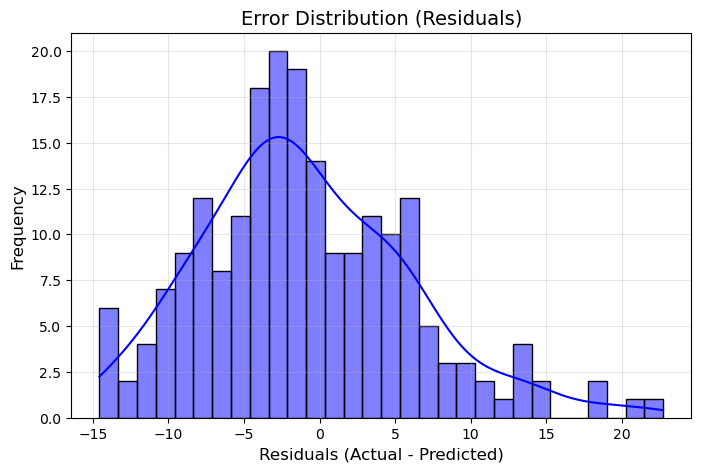

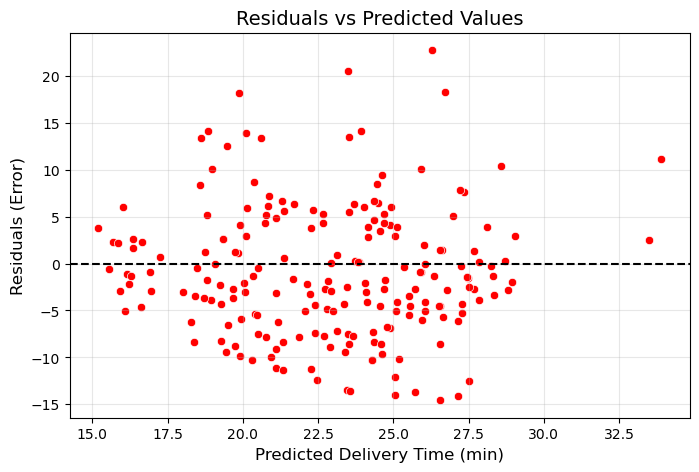

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot the residuals' distribution (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Error Distribution (Residuals)', fontsize=14)
plt.xlabel('Residuals (Actual - Predicted)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# Plot residuals vs predicted values
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1.5)
plt.title('Residuals vs Predicted Values', fontsize=14)
plt.xlabel('Predicted Delivery Time (min)', fontsize=12)
plt.ylabel('Residuals (Error)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

Interpretation:
The residuals are centered around 0 with a roughly normal distribution, it indicates that the model has good predictive behavior.
The scatterplot shows a random spread with no clear patterns, it suggests that the model captures the data well without systematic bias.

## Target variable: Delivery person rating

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

new_df.columns = new_df.columns.str.strip()

X2 = new_df[['Delivery_person_Age', 'Time_taken(min)', 'driving_distance', 'Type_of_vehicle_bicycle', 'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter']]
y2 = new_df['Delivery_person_Ratings']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

y2_pred = model2.predict(X2_test)

rmse = np.sqrt(mean_squared_error(y2_test, y2_pred))
print(f'Root Mean Squared Error: {rmse}')

coefficients = pd.DataFrame(model2.coef_, X2.columns, columns=['Coefficient'])
print(coefficients)

Root Mean Squared Error: 0.23052682249256043
                                  Coefficient
Delivery_person_Age                  0.006040
Time_taken(min)                     -0.011051
driving_distance                     0.006932
Type_of_vehicle_bicycle             -0.046450
Type_of_vehicle_electric_scooter     0.042186
Type_of_vehicle_motorcycle          -0.031399
Type_of_vehicle_scooter              0.035664


Coefficient Interpretations:

Time_taken(min) (-0.011051): For each additional minute taken, the predicted rating decreases by approximately 0.011 units. This implies that longer delivery times might lead to lower ratings.

Driving_distance (0.006932): For each additional kilometer in driving distance, the predicted rating increases by approximately 0.007 units. This suggests that longer driving distances might be slightly associated with higher ratings.

Type_of_vehicle_bicycle (-0.046450): If the delivery is made using a bicycle, the predicted rating decreases by approximately 0.046 units compared to other vehicle types.

Type_of_vehicle_electric_scooter (0.042186): If the delivery is made using an electric scooter, the predicted rating increases by approximately 0.042 units compared to other vehicle types.

Type_of_vehicle_motorcycle (-0.031399): If the delivery is made using a motorcycle, the predicted rating decreases by approximately 0.031 units compared to other vehicle types.

Type_of_vehicle_scooter (0.035664): If the delivery is made using a scooter, the predicted rating increases by approximately 0.036 units compared to other vehicle types.

In conclusion:

Older delivery personnel receive slightly higher ratings.

Longer delivery times negatively impact ratings.

Longer driving distances slightly improve ratings.

Bicycles and motorcycles slightly decrease ratings compared to other vehicles.

Electric scooters and scooters slightly improve ratings compared to other vehicles.

The average error in predictions is approximately 0.23 units. Given that rating scales are (1,5) an RMSE of 0.23 suggests that model is quite accurate.